In [34]:
# memanggil modul yang diperlukan
import cv2
import numpy as np
from matplotlib import pyplot as plt


[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Text(0.5, 1.0, 'Histogram Output')

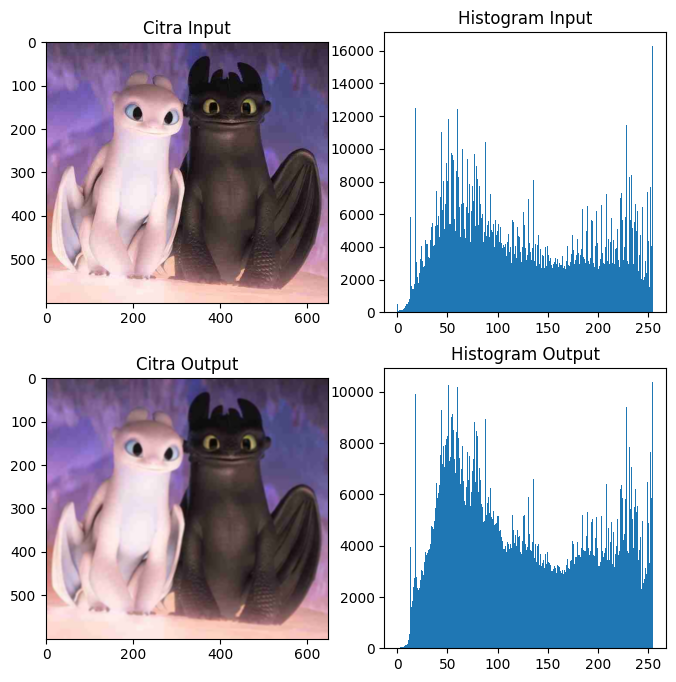

In [78]:
#membaca gambar yang disimpan pada file
tootles = cv2.imread('tooth.jpg')
tootles = cv2.cvtColor(tootles, cv2.COLOR_BGR2RGB)#membaca gambar sebelumnya lalu diubah ke format rgb
#membuat filter: matriks berukuran 5 x 5 
kernel = np.ones((5,5),np.float32)/25
print(kernel)

# lakukan filtering
tootles_filter = cv2.filter2D(tootles,-1,kernel)

fig, axes = plt.subplots(2, 2, figsize=(8, 8)) #membuat tata letak subplot
ax = axes.ravel() #digunakan untuk meratakan array 

ax[0].imshow(tootles, cmap=plt.cm.gray) #menampilkan gambar
ax[0].set_title("Citra Input") #menambahkan judul pada gambar
ax[1].hist(tootles.ravel(), bins=256) #menampilkan histogram
ax[1].set_title('Histogram Input') #menambahkan judul pada histogram

ax[2].imshow(tootles_filter, cmap=plt.cm.gray)
ax[2].set_title("Citra Output")
ax[3].hist(tootles_filter.ravel(), bins=256)
ax[3].set_title('Histogram Output')

#cv2.imshow('Tootles', tootles)#menampilkan gambar asli 
#cv2.imshow('Tootles_Filter', tootles_filter)#menampilkan gambar hasil filtering
#cv2.waitKey(0)
#cv2.destroyAllWindows()

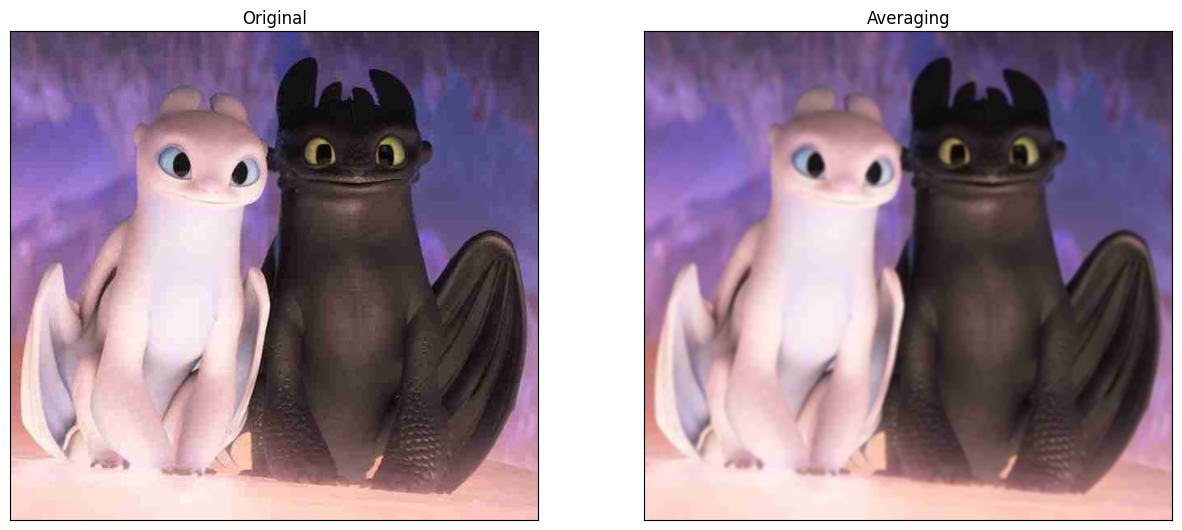

In [77]:
# perbesar ukuran hasil plotting jika diperlukan
plt.rcParams["figure.figsize"] = (15,15)

# plot pertama, gambar asli
plt.subplot(121),plt.imshow(tootles),plt.title('Original')
plt.xticks([]), plt.yticks([])

# kedua, hasil filter
plt.subplot(122),plt.imshow(tootles_filter),
plt.title('Averaging')
plt.xticks([]), plt.yticks([])

# Plot!
plt.show()


In [11]:
tootles_blur = cv2.blur(tootles,(5,5))#melakukan filtering blur pada gambar
# menampilkan gambar hasil filtering
cv2.imshow('Tootles_Blur', tootles_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
#cara lain untuk membuat sebuah kernel yaitu dengan menggunakan np.matrix berukuran 3 x 3
kernel = np.matrix([
          [1, 1, 1],
          [1, 2, 1],
          [1, 1, 1]         
          ])/25
print(kernel)

# melakukan filtering 
Tootles_filter = cv2.filter2D(tootles,-1,kernel)

# menampilkan gambar hasil filtering
cv2.imshow('Tootles_Filter', Tootles_filter)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.04 0.04 0.04]
 [0.04 0.08 0.04]
 [0.04 0.04 0.04]]


HIGHPASS FILTER

In [7]:
#IMPORT LIBRARY
import cv2
import numpy as np
from matplotlib import pyplot as plt

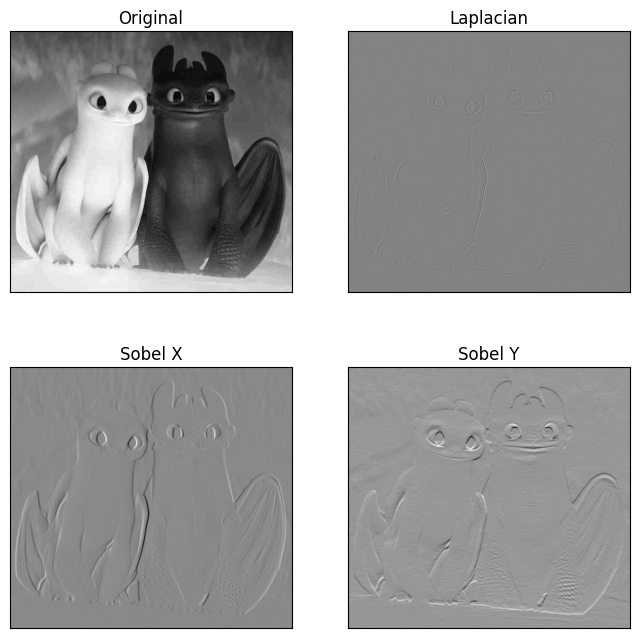

In [10]:
# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('tooth.jpg',0)

# menerapkan algoritma high-pass filtering:
# laplacian
laplacian = cv2.Laplacian(img,cv2.CV_64F)

# sobel dengan ukuran kernel 5
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

# Catatan:
# CV_64F pada contoh di atas menunjukkan nilai bit dari citra 
# yang dihasilkan serta tipe datanya (F = Float)

# perbesar ukuran hasil plotting 
plt.rcParams["figure.figsize"] = (8,8)


# menampilkan hasil filter
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

Text(0.5, 1.0, 'Histogram Edge Image')

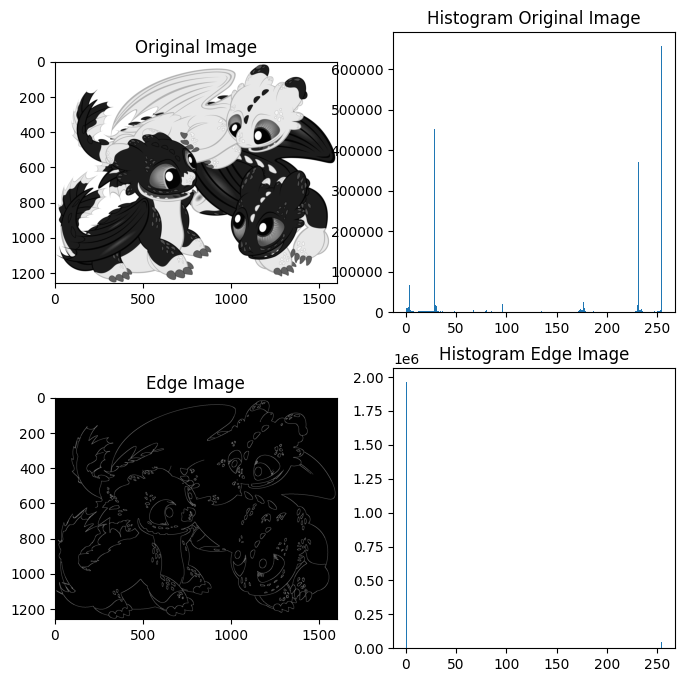

In [79]:
# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('fury.png',0)

# memanggil fungsi Canny Edges dengan argument (citra, nilai_min, nilai_max)
edges = cv2.Canny(img,250,450)

fig, axes = plt.subplots(2, 2, figsize=(8, 8)) #membuat tata letak subplot
ax = axes.ravel() #digunakan untuk meratakan array 

ax[0].imshow(img, cmap=plt.cm.gray) #menampilkan gambar
ax[0].set_title("Original Image") #menambahkan judul pada gambar
ax[1].hist(img.ravel(), bins=256) #menampilkan histogram
ax[1].set_title('Histogram Original Image') #menambahkan judul pada histogram

ax[2].imshow(edges, cmap=plt.cm.gray)
ax[2].set_title("Edge Image")
ax[3].hist(edges.ravel(), bins=256)
ax[3].set_title('Histogram Edge Image')

#plt.subplot(121),plt.imshow(img,cmap = 'gray')
#plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(edges,cmap = 'gray')
#plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

#plt.show()

IMAGE TRASHOLDING

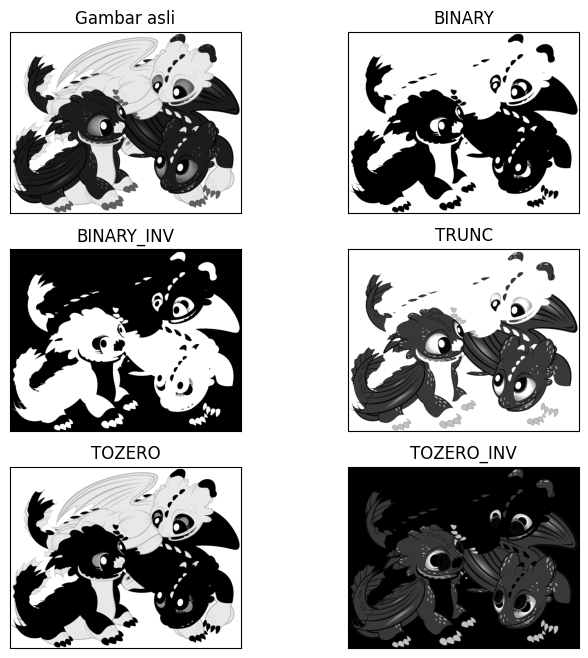

In [13]:
# membaca gambar baymax 
img = cv2.imread('fury.png',0)

# Hitungan threshold. 
# Perhatikan nilai ambang batas bawah dan atas dari tiap fungsi 
# yang diberikan
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

# menampilkan hasil
titles = ['Gambar asli','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# menampilkan beberapa gambar sekaligus
for i in range(6):
    # 3 baris, 2 kolom
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Text(0.5, 1.0, 'Histogram Edge Image')

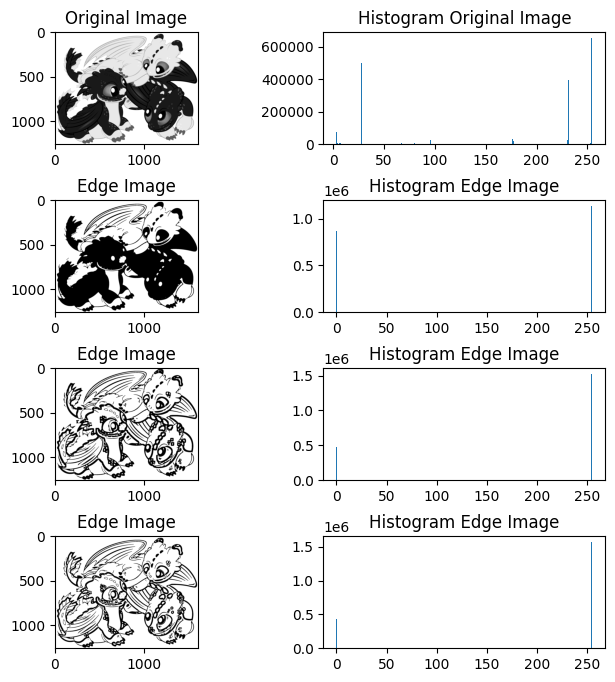

In [86]:
# digunakan median blur untuk menghaluskan tepi objek pada citra
# ini diperlukan agar thresholding memberikan hasil lebih baik
img = cv2.medianBlur(img,5)

# Lakukan Thresholding
# Binary Threshold
ret,th1 = cv2.threshold(img,200,255,cv2.THRESH_BINARY)

# Adaptive Threshold dengan Mean
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,35,2)

# Adaptive Threshold dengan Gaussian
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,45,2)

fig, axes = plt.subplots(4, 2, figsize=(8, 8)) #membuat tata letak subplot
plt.subplots_adjust(wspace=0.2, hspace= 0.5) #menentukan besarnya jarak gambar
ax = axes.ravel() #digunakan untuk meratakan array 

ax[0].imshow(img, cmap=plt.cm.gray) #menampilkan gambar
ax[0].set_title("Original Image") #menambahkan judul pada gambar
ax[1].hist(img.ravel(), bins=256) #menampilkan histogram
ax[1].set_title('Histogram Original Image') #menambahkan judul pada histogram

ax[2].imshow(th1, cmap=plt.cm.gray)
ax[2].set_title("Edge Image")
ax[3].hist(th1.ravel(), bins=256)
ax[3].set_title('Histogram Edge Image')

ax[4].imshow(th2, cmap=plt.cm.gray)
ax[4].set_title("Edge Image")
ax[5].hist(th2.ravel(), bins=256)
ax[5].set_title('Histogram Edge Image')

ax[6].imshow(th3, cmap=plt.cm.gray)
ax[6].set_title("Edge Image")
ax[7].hist(th3.ravel(), bins=256)
ax[7].set_title('Histogram Edge Image')

# Plotting
#titles = ['Original Image', 'Global Thresholding (v = 200)',
            #'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
#images = [img, th1, th2, th3]

# menampilkan hasil
#for i in range(4):
    #plt.subplot(2,2,i+1)
    #plt.imshow(images[i],'gray')
    #plt.title(titles[i])
    #plt.xticks([]),plt.yticks([])
#plt.show()